NetworkX + GNN testing

In [1]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [32]:
sg = "/home/lucasjia/projects/AMS-opt/netlists/diff_amps/75/75_sg.json"
kg = "/home/lucasjia/projects/AMS-opt/netlists/diff_amps/75/75_kg.json"
full = "/home/lucasjia/projects/AMS-opt/netlists/diff_amps/75/75_full_graph.json"

In [33]:
with open(sg) as f:
    sg_data = json.load(f)

with open(kg) as f:
    kg_data = json.load(f)

with open(full) as f:
    fg_data = json.load(f)

G_sg = json_graph.node_link_graph(sg_data)
G_kg = json_graph.node_link_graph(kg_data)
G = json_graph.node_link_graph(fg_data)


/home/lucasjia/miniconda3/envs/analog/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


/tmp/ipykernel_2364466/1687536782.py:33: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


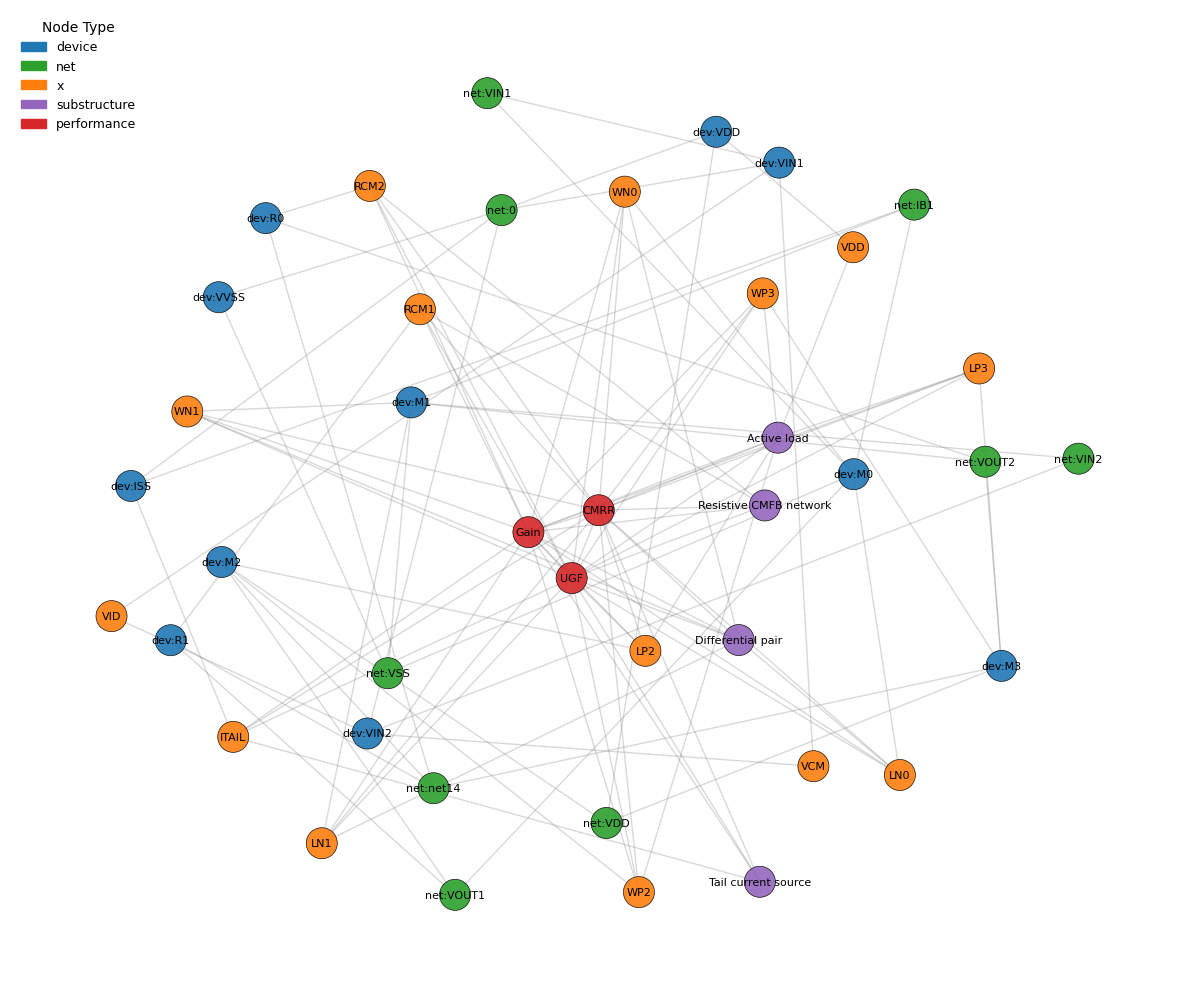

In [ ]:
# layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=3, k=1.5)

# Define colors for node types
type_colors = {
    "device": "#1f77b4",
    "net": "#2ca02c",
    "x": "#ff7f0e",
    "substructure": "#9467bd",
    "performance": "#d62728",
    "unknown": "#aaaaaa"
}

# Extract type attributes (some nodes may be missing it)
node_types = nx.get_node_attributes(G, "type")
node_colors = []
for n in G.nodes:
    t = node_types.get(n, "unknown")
    node_colors.append(type_colors.get(t, "#aaaaaa"))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_size=500,
    node_color=node_colors,
    edgecolors="black",
    linewidths=0.5,
    alpha=0.9
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    arrows=G.is_directed(),
    alpha=0.3,
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Build legend manually
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=t) for t, c in type_colors.items() if t in node_types.values()]
plt.legend(handles=legend_handles, fontsize=9, frameon=False, loc="upper left", title="Node Type")

plt.axis("off")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2364466/1718666430.py:5: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


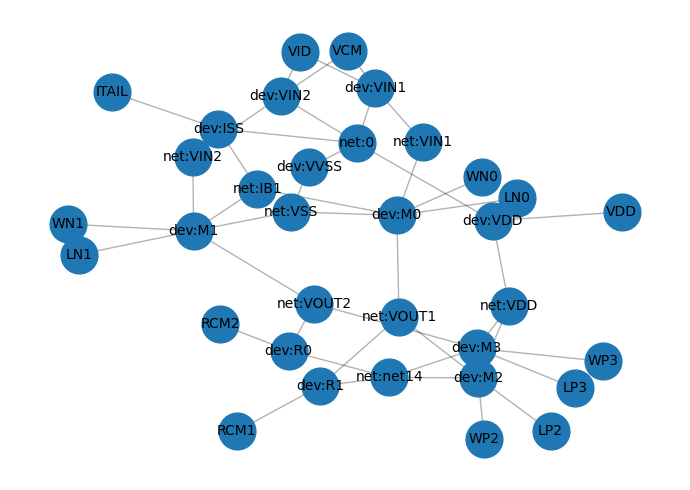

In [29]:
plt.figure(figsize=(7,5))
pos = nx.spring_layout(G_sg, seed=3)

nx.draw_networkx_nodes(G_sg, pos, node_size=700)
nx.draw_networkx_edges(
    G_sg, pos,
    arrows=G_sg.is_directed(),           # arrows for DiGraph only
    connectionstyle="arc3,rad=0.07",   # slight curve to reduce overlap
    alpha=0.3
)
nx.draw_networkx_labels(G_sg, pos, font_size=10)

plt.axis("off")
plt.tight_layout()
plt.show()

/tmp/ipykernel_2364466/327570708.py:5: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


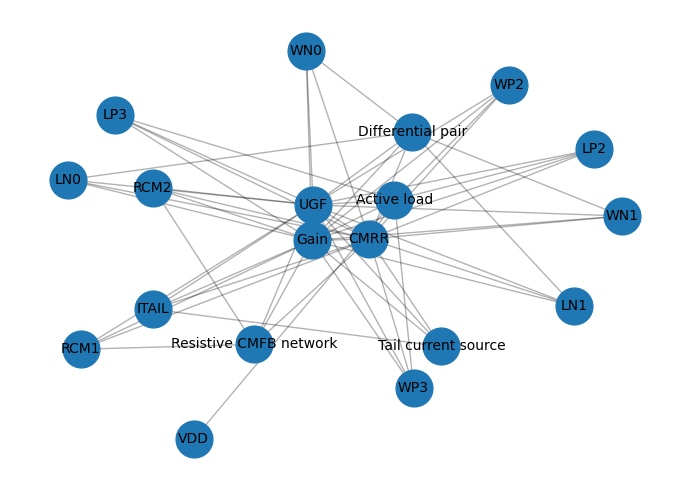

In [27]:
plt.figure(figsize=(7,5))
pos = nx.spring_layout(G_kg, seed=3, k=1.5)

nx.draw_networkx_nodes(G_kg, pos, node_size=700)
nx.draw_networkx_edges(
    G_kg, pos,
    arrows=G_kg.is_directed(),           # arrows for DiGraph only
    connectionstyle="arc3,rad=0.07",   # slight curve to reduce overlap
    alpha=0.3
)
nx.draw_networkx_labels(G_kg, pos, font_size=10)

plt.axis("off")
plt.tight_layout()
plt.show()